In [1]:
import pandas as pd
import cv2
import os
import zipfile
from xml.dom import minidom
import matplotlib.pyplot as plt

# Extracting the cat face detection datas

In [2]:
# Path to the zip file
zip_path = './Cat_Face_Detection.zip'
# Temporary directory to extract files
extract_dir = './Cat_Face_Detection'

# Ensure the extract directory exists
os.makedirs(extract_dir, exist_ok=True)

In [3]:
cat_face = None
cat_img_array = None
# these contain the parameters for building a detection model
cat_xml = None
extended_cat_xml = None
# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all the contents into the directory
    zip_ref.extractall(extract_dir)

    file_names = zip_ref.namelist()
    for file_name in file_names:
        full_file_path = os.path.join(extract_dir, file_name)
        # Construct the full path to the extracted file
        if (file_name == 'cat.jpg') == 1:
            cat_face = cv2.imread(full_file_path, cv2.IMREAD_GRAYSCALE)
        if (file_name == 'haarcascade_frontalcatface.xml') == 1:
            doc = minidom.parse(full_file_path)
            cat_xml = doc.documentElement
        if (file_name == 'haarcascade_frontalcatface_extended.xml') == 1:
            doc = minidom.parse(full_file_path)
            extended_cat_xml = doc.documentElement

# Data Preparation

### Creating new feature dataframes using filters and image manipulations

In [4]:
cat_face.shape

(599, 449)

In [5]:
cat_df = pd.DataFrame(cat_face).head()

In [6]:
cat_df.head()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,448
0,159,162,166,171,175,178,180,180,179,179,...,191,191,191,191,191,190,190,190,190,190
1,159,162,166,171,176,179,181,181,179,179,...,191,191,191,191,191,190,190,190,190,189
2,159,162,167,172,177,180,182,183,180,180,...,191,191,191,191,191,190,190,190,190,189
3,159,162,168,174,179,182,184,184,181,180,...,191,191,191,191,191,190,190,190,190,189
4,160,163,169,175,180,183,185,185,181,181,...,191,191,191,191,191,190,190,190,190,190


In [7]:
# Apply GaussianBlur to reduce noise and improve edge detection
cat_face_blurred = cv2.GaussianBlur(cat_face, (5, 5), 0)

In [8]:
cat_df_blurred = pd.DataFrame(cat_face_blurred)
cat_df_blurred.head()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,448
0,161,163,167,171,175,178,180,180,180,179,...,191,191,191,191,191,190,190,190,190,190
1,161,163,167,171,175,179,180,181,180,179,...,191,191,191,191,191,190,190,190,190,190
2,162,163,167,172,177,180,181,182,181,180,...,191,191,191,191,191,190,190,190,190,190
3,162,164,168,173,178,181,183,183,182,180,...,191,191,191,191,191,190,190,190,190,190
4,163,165,169,175,179,182,184,184,182,181,...,191,191,191,191,191,190,190,190,190,190


In [9]:
# Use Canny function for edge detection (using the blurred image as input to reduce noise)
cat_face_edges = cv2.Canny(cat_face_blurred, threshold1=30, threshold2=100)  # these thresholds can be tuned
cat_df_edges = pd.DataFrame(cat_face_edges)
cat_df_edges.head()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,448
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

(-0.5, 448.5, 598.5, -0.5)

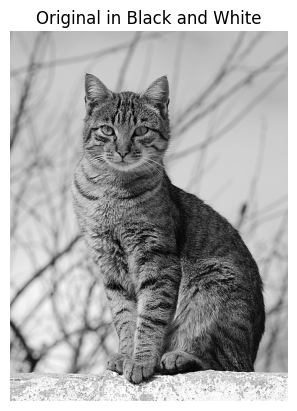

In [10]:
# Plotting the Grayscale Image
plt.imshow(cat_face, cmap='gray')
plt.title('Original in Black and White')
plt.axis('off')

(-0.5, 448.5, 598.5, -0.5)

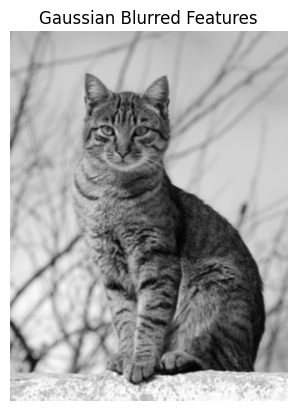

In [11]:
# Plotting the Blurred Image
plt.imshow(cat_face_blurred, cmap='gray')
plt.title('Gaussian Blurred Features')
plt.axis('off')

(-0.5, 448.5, 598.5, -0.5)

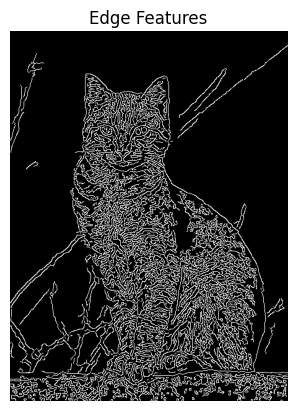

In [12]:
#plotting the edge image
plt.imshow(cat_face_edges, cmap='gray')
plt.title('Edge Features')
plt.axis('off')